In [2]:
import numpy as np 
import pandas as pd 
import os
from matplotlib import pyplot as plt
from scipy.spatial import distance

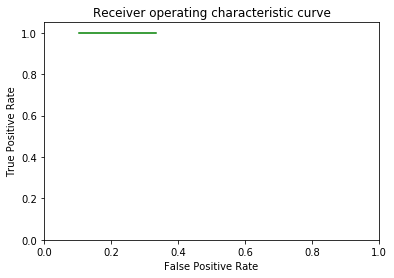

In [38]:
data_roc = pd.read_csv('summary_roc.csv')
plt.plot(data_roc["FPR"],data_roc["TPR"],'g')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')

plt.show()

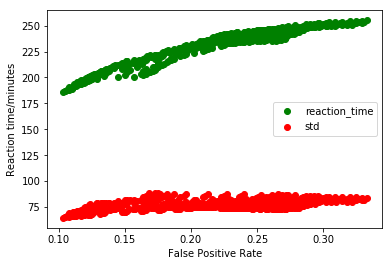

In [47]:
plt.plot(data_roc["FPR"],data_roc[" reaction_time"],'go',label='reaction_time')
plt.plot(data_roc["FPR"],data_roc["rectime_std"],'ro',label='std')

plt.xlabel('False Positive Rate')
plt.ylabel('Reaction time/minutes')
plt.legend(loc="center right")
plt.show()

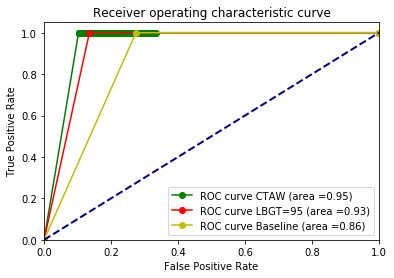

In [43]:
from sklearn.metrics import auc, roc_curve
tpr={}
fpr={}
AUC={}

tpr[0] = [0] + data_roc["TPR"].tolist() + [1.0]
fpr[0] = [0] + data_roc["FPR"].tolist() + [1.0]
AUC[0] = auc(fpr[0],tpr[0])

tpr[1]=[0,1,1]
fpr[1]=[0,0.2743,1]
AUC[1] = auc(fpr[1],tpr[1])

tpr[2]=[0,1,1]
fpr[2]=[0,0.1354,1]
AUC[2] = auc(fpr[2],tpr[2])

# print(tpr)
plt.plot(fpr[0],tpr[0],'g',marker='o',label='ROC curve CTAW (area =%.2f)'%AUC[0])
plt.plot(fpr[2],tpr[2],'r',marker='o',label='ROC curve LBGT=95 (area =%.2f)'%AUC[2])
plt.plot(fpr[1],tpr[1],'y',marker='o',label='ROC curve Baseline (area =%.2f)'%AUC[1])
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [6]:
data= pd.read_csv('time_analysis.csv')
x0 =np.arange(0,len(data),1)

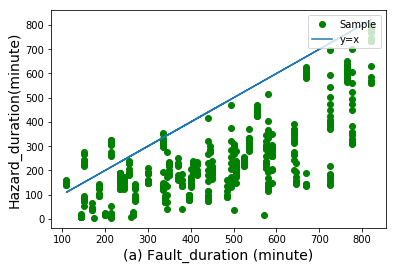

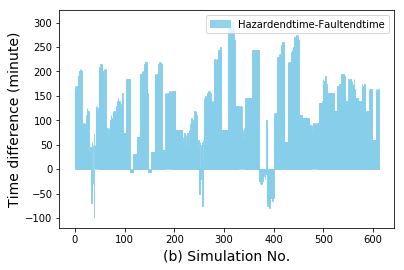

In [7]:
#draw graph of hazard_duration vs fault_duration
plt.plot(data['fault_duration'],data['hazard_duration'],'go',label='Sample')
plt.plot(data['fault_duration'],data['fault_duration'],'-',label='y=x',)
# plt.plot(x0,x0,color='r')
plt.xlabel('(a) Fault_duration (minute)', fontsize=14)
plt.ylabel('Hazard_duration(minute)', fontsize=14)

plt.legend(loc='upper right')
plt.show()

# plt.plot(x0,data['hazardendtime(T4)']-data['faultendtiome(T5)'],label='hazard_duration',color='g')
plt.bar(x0,data['hazardendtime(T4)']-data['faultendtiome(T5)'], alpha=0.9, width = 0.9, facecolor = 'skyblue', edgecolor = 'skyblue', label="Hazardendtime-Faultendtime", lw=1)
plt.xlabel('(b) Simulation No.', fontsize=14)
plt.ylabel('Time difference (minute)', fontsize=14)
plt.legend(loc='upper right')
plt.show()

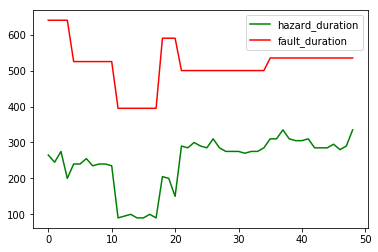

In [4]:
plt.plot(x0,data['hazard_duration'],label='hazard_duration',color='g')
plt.plot(x0,data['fault_duration'],label='fault_duration',color='r')
plt.legend(loc='upper right')
plt.show()

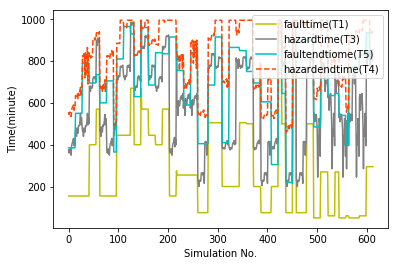

In [8]:
#draw Time propogation of T1,3,4,5
plt.plot(x0,data['faulttime(T1)'],label='faulttime(T1)',color='y')
plt.plot(x0,data['hazardtime(T3)'],label='hazardtime(T3)',color='grey')
plt.plot(x0,data['faultendtiome(T5)'],label='faultendtiome(T5)',color='c')
plt.plot(x0,data['hazardendtime(T4)'],label='hazardendtime(T4)',color='orangered',linestyle='--')
plt.xlabel('Simulation No.', fontsize=10)
plt.ylabel('Time(minute)', fontsize=10)

plt.legend(loc='upper right')
plt.show()

In [6]:
distance.jaccard([0,1],[1,2])
hz_data = pd.read_csv("summary_monitor_hardware.csv")


In [13]:
print(hz_data["alert"].tolist())

['row_32', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'row_27||row_27||row_32||row_38||row_32||row_38||row_32||row_38||row_38||row_32||row_38||row_32||row_38||row_32||row_38||row_32||row_38||row_32||row_38||row_32||row_38||row_32', 'row_27||row_27||row_27||row_27||row_27||row_27||row_27||row_31||row_27||row_32||row_38||row_32||row_38||row_32||row_38||row_32||row_38||row_32||row_38||row_38||row_32||row_38||row_32||row_38||row_38||row_32||row_38||row_32||row_38||row_32||row_38', 'row_32||row_32||row_38||row_32||row_38||row_32||row_38||row_32||row_38||row_32||row_38||row_32||row_38||row_32||row_38||row_32||row_38||row_32', 'row_27||row_32||row_38||row_32||row_38||row_32||row_38||row_32||row_38||row_38||row_32||row_38||row_32||

In [26]:
import re
pattern = re.compile(r'\d+')
alert = hz_data["alert"].tolist()
alert_list=[]
for i in range(len(alert)-1):  
    result = pattern.findall(str(alert[i]))
    if result:
#         alert_list.append(result)
        alert_list += result
print(np.array(alert_list))

['32' '27' '27' ... '22' '22' '22']


In [27]:
unique_elements, counts_elements = np.unique(np.array(alert_list), return_counts=True)

In [28]:
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[['2' '22' '27' '3' '31' '32' '33' '37' '38' '4' '5' '6']
 ['19' '6523' '11407' '3' '630' '3026' '20' '2818' '15266' '123' '10'
  '13']]
